In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Imputer
from sklearn.model_selection import cross_validate, cross_val_score, KFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


%matplotlib inline

In [2]:
# loans_tr 데이터를 load
loans = pd.read_csv('loans_tr.csv')

In [3]:
# Exploratory Data Aanalysis
loans.head()

,Unnamed: 0,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [4]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8578 entries, 0 to 8577
Data columns (total 15 columns):
Unnamed: 0           8578 non-null int64
credit.policy        8578 non-null int64
purpose              8578 non-null object
int.rate             8578 non-null float64
installment          8578 non-null float64
log.annual.inc       8578 non-null float64
dti                  8578 non-null float64
fico                 8578 non-null int64
days.with.cr.line    8578 non-null float64
revol.bal            8578 non-null int64
revol.util           8578 non-null float64
inq.last.6mths       8578 non-null int64
delinq.2yrs          8578 non-null int64
pub.rec              8578 non-null int64
not.fully.paid       8578 non-null int64
dtypes: float64(6), int64(8), object(1)
memory usage: 1005.3+ KB


In [5]:
loans.describe()

,Unnamed: 0,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,8578.000000,8578.000000,8578.000000,8578.000000,8578.000000,8578.000000,8578.000000,8578.000000,8.578000e+03,8578.000000,8578.000000,8578.000000,8578.000000,8578.000000
mean,4798.572511,0.803567,0.122617,318.093373,10.932431,12.622325,710.749709,4547.756538,1.706579e+04,46.757076,1.571695,0.164607,0.062252,0.159594
std,2766.006017,0.397323,0.026817,206.994270,0.615859,6.881663,38.088227,2494.931515,3.450448e+04,29.000330,2.197341,0.550745,0.264656,0.366251
min,0.000000,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2399.250000,1.000000,0.103900,163.570000,10.555813,7.242500,682.000000,2792.781250,3.193250e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,4804.500000,1.000000,0.122100,267.740000,10.928884,12.660000,707.000000,4110.041667,8.690000e+03,46.200000,1.000000,0.000000,0.000000,0.000000
75%,7193.500000,1.000000,0.140700,430.750000,11.294022,17.960000,737.000000,5729.958333,1.843375e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,9576.000000,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [6]:
# Object type data 
loans['credit.policy'].unique()

array([1, 0], dtype=int64)

In [7]:
loans['credit.policy'].value_counts()

1    6893
0    1685
Name: credit.policy, dtype: int64

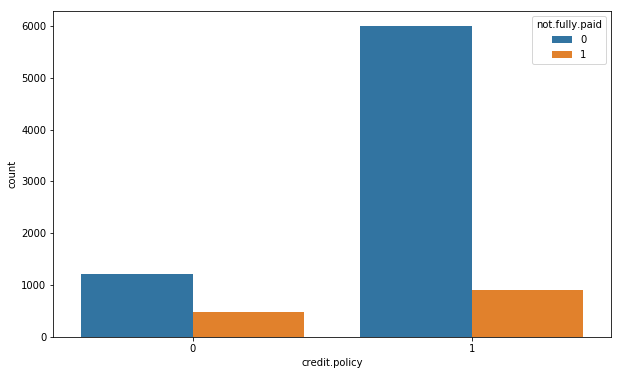

In [8]:
plt.figure(figsize=(10,6))
sns.countplot(loans['credit.policy'], hue=loans['not.fully.paid'])

In [9]:
loans.groupby('not.fully.paid')['credit.policy'].value_counts()

not.fully.paid  credit.policy
0               1                5998
                0                1211
1               1                 895
                0                 474
Name: credit.policy, dtype: int64

In [10]:
# purpose

In [11]:
loans['purpose'].unique()

array(['debt_consolidation', 'credit_card', 'all_other',
       'home_improvement', 'small_business', 'major_purchase',
       'educational'], dtype=object)

In [12]:
loans['purpose'].value_counts()

debt_consolidation    3547
all_other             2082
credit_card           1143
home_improvement       556
small_business         547
major_purchase         395
educational            308
Name: purpose, dtype: int64

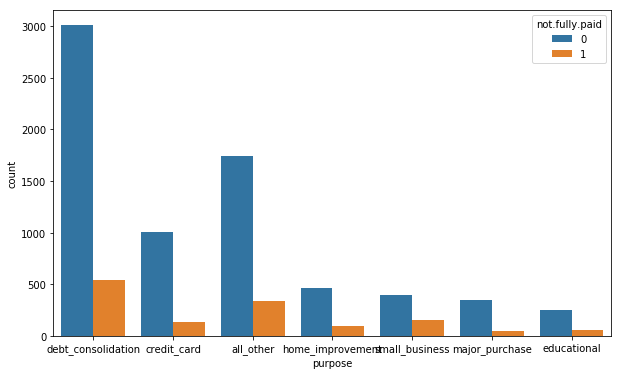

In [13]:
plt.figure(figsize=(10,6))
sns.countplot(loans['purpose'], hue=loans['not.fully.paid'])

In [14]:
# int.rate

In [15]:
loans['int.rate'].value_counts()

0.1253    322
0.0894    259
0.1183    222
0.1218    195
0.1114    191
0.0963    186
0.1287    182
0.0800    177
0.1148    177
0.0859    166
0.1221    161
0.0932    161
0.1189    145
0.0774    144
0.1322    138
0.1284    133
0.1347    132
0.1357    130
0.1392    128
0.1316    125
0.1426    119
0.1496    118
0.1600    115
0.1379    108
0.1461    102
0.1531    102
0.1411    100
0.1158     97
0.1442     94
0.1126     85
         ... 
0.2052      3
0.1467      3
0.1462      3
0.0639      3
0.1349      3
0.1646      3
0.1682      3
0.1457      3
0.1633      2
0.1791      2
0.1759      2
0.1886      2
0.1793      2
0.1728      2
0.1830      2
0.1904      2
0.2164      2
0.1936      2
0.1709      2
0.1854      1
0.1756      1
0.1778      1
0.2016      1
0.1746      1
0.1941      1
0.1741      1
0.1772      1
0.1867      1
0.1620      1
0.1683      1
Name: int.rate, Length: 247, dtype: int64

In [16]:
loans['int.rate'].unique()

array([0.1189, 0.1071, 0.1357, 0.1008, 0.1426, 0.0788, 0.1496, 0.1114,
       0.1134, 0.1221, 0.1347, 0.1324, 0.0859, 0.0714, 0.0863, 0.1103,
       0.1317, 0.0894, 0.1039, 0.1513, 0.08  , 0.1229, 0.0901, 0.0743,
       0.1375, 0.0807, 0.1028, 0.087 , 0.1122, 0.0996, 0.0933, 0.0838,
       0.0775, 0.1059, 0.1596, 0.1343, 0.1249, 0.0964, 0.1186, 0.1501,
       0.128 , 0.1091, 0.1217, 0.1533, 0.1154, 0.0712, 0.1438, 0.1565,
       0.1467, 0.1312, 0.147 , 0.1407, 0.1014, 0.133 , 0.1393, 0.092 ,
       0.1236, 0.1362, 0.1078, 0.1583, 0.1141, 0.1267, 0.1204, 0.0951,
       0.1172, 0.1109, 0.1299, 0.1488, 0.0983, 0.1425, 0.1046, 0.1836,
       0.06  , 0.0832, 0.0945, 0.1197, 0.1387, 0.1292, 0.0976, 0.0737,
       0.1355, 0.0768, 0.1166, 0.1418, 0.1545, 0.1482, 0.1261, 0.1703,
       0.145 , 0.1671, 0.1576, 0.1608, 0.164 , 0.1734, 0.1051, 0.157 ,
       0.1222, 0.1273, 0.1253, 0.1128, 0.1286, 0.1287, 0.097 , 0.1191,
       0.1001, 0.1254, 0.1159, 0.138 , 0.1096, 0.1064, 0.1349, 0.1033,
      

In [17]:
# installment

In [18]:
loans['installment'].unique()

array([829.1 , 228.22, 366.86, ..., 113.63, 161.01, 257.7 ])

In [19]:
loans['installment'].value_counts()

317.72    34
316.11    31
319.47    29
381.26    27
662.68    25
334.67    22
156.10    22
313.37    21
669.33    21
320.95    21
328.04    20
188.02    20
333.00    19
190.63    18
333.15    18
659.37    18
156.69    18
666.00    18
481.42    17
167.34    17
312.19    17
159.74    16
385.14    16
508.84    15
267.74    15
336.34    15
401.60    15
219.36    15
476.58    15
340.76    14
          ..
475.75     1
110.46     1
202.42     1
59.16      1
164.22     1
135.41     1
639.04     1
289.14     1
140.56     1
239.65     1
478.70     1
53.35      1
477.13     1
253.09     1
116.02     1
192.62     1
532.18     1
426.02     1
435.17     1
409.62     1
295.59     1
845.25     1
261.32     1
172.07     1
517.20     1
379.94     1
344.21     1
99.25      1
549.95     1
120.67     1
Name: installment, Length: 4466, dtype: int64

In [20]:
loans['dti'].unique()

array([19.48, 14.29, 11.63, ..., 23.74, 20.81, 24.05])

In [21]:
loans['dti'].value_counts()

0.00     80
10.00    18
0.60     15
12.00    13
19.20    12
10.80    12
8.21     12
6.00     12
13.16    12
8.52     11
15.60    11
9.51     11
15.10    11
9.80     11
14.20    10
16.97    10
15.38    10
3.42     10
15.02    10
17.04    10
15.00    10
17.68    10
20.00    10
4.33     10
3.60     10
7.00     10
14.77     9
17.82     9
9.66      9
19.87     9
         ..
26.40     1
5.51      1
3.39      1
19.41     1
28.35     1
27.15     1
2.79      1
20.36     1
26.15     1
6.04      1
25.72     1
22.86     1
6.98      1
10.31     1
29.60     1
11.83     1
7.94      1
28.15     1
2.05      1
15.71     1
26.13     1
8.69      1
10.67     1
25.08     1
4.73      1
27.86     1
26.46     1
3.51      1
24.68     1
18.49     1
Name: dti, Length: 2484, dtype: int64

In [22]:
df = loans

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8578 entries, 0 to 8577
Data columns (total 15 columns):
Unnamed: 0           8578 non-null int64
credit.policy        8578 non-null int64
purpose              8578 non-null object
int.rate             8578 non-null float64
installment          8578 non-null float64
log.annual.inc       8578 non-null float64
dti                  8578 non-null float64
fico                 8578 non-null int64
days.with.cr.line    8578 non-null float64
revol.bal            8578 non-null int64
revol.util           8578 non-null float64
inq.last.6mths       8578 non-null int64
delinq.2yrs          8578 non-null int64
pub.rec              8578 non-null int64
not.fully.paid       8578 non-null int64
dtypes: float64(6), int64(8), object(1)
memory usage: 1005.3+ KB


In [24]:
df_onehot = pd.get_dummies(df,columns=['purpose'], drop_first=True)
df_onehot.head()

,Unnamed: 0,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


In [25]:
x = df_onehot.drop(['credit.policy','not.fully.paid'], axis=1)
y = df_onehot['not.fully.paid']

In [26]:
# X_data, y_data division
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

In [27]:
# train data, test data division


In [28]:
# Compare Algorithms - model selection
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [29]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score
from sklearn.model_selection import cross_val_score

In [30]:
logistic_regression = LogisticRegression(random_state=1)  
logistic_regression.fit(x_train, y_train)
pred_logistic = logistic_regression.predict(x_test)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [31]:
print(classification_report(y_test, pred_logistic))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91      2166
           1       0.31      0.01      0.02       408

   micro avg       0.84      0.84      0.84      2574
   macro avg       0.57      0.50      0.47      2574
weighted avg       0.76      0.84      0.77      2574



In [32]:
print('f1 정확도 : ', f1_score(y_test, pred_logistic))

f1 정확도 :  0.01900237529691211


In [33]:
print('cv 훈련 세트 정확도 :   ', np.mean(cross_val_score(logistic_regression, x_train, y_train, cv=5)))
print('cv 테스트 세트 정확도 : ', np.mean(cross_val_score(logistic_regression, x_test, y_test, cv=5)))

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

cv 훈련 세트 정확도 :    0.8387733382654406
cv 테스트 세트 정확도 :  0.8407175176930496


C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

In [34]:
print('훈련 세트 정확도 :   ', logistic_regression.score(x_train, y_train))
print('테스트 세트 정확도 : ', logistic_regression.score(x_test, y_test))

훈련 세트 정확도 :    0.8397734843437709
테스트 세트 정확도 :  0.8395493395493395


In [35]:
# knn

In [36]:
knn = KNeighborsClassifier()  # n_neighbors = ?
knn.fit(x_train, y_train)
pred_knn = knn.predict(x_test)

In [37]:
print(classification_report(y_test, pred_knn))

              precision    recall  f1-score   support

           0       0.85      0.97      0.90      2166
           1       0.32      0.09      0.14       408

   micro avg       0.83      0.83      0.83      2574
   macro avg       0.59      0.53      0.52      2574
weighted avg       0.77      0.83      0.78      2574



In [38]:
print('f1 정확도 : ', f1_score(y_test, pred_knn))

f1 정확도 :  0.13872832369942198


In [39]:
print('cv 훈련 세트 정확도 :   ', np.mean(cross_val_score(knn, x_train, y_train, cv=5)))
print('cv 테스트 세트 정확도 : ', np.mean(cross_val_score(knn, x_test, y_test, cv=5)))

cv 훈련 세트 정확도 :    0.821118047541266
cv 테스트 세트 정확도 :  0.8185687306190568


In [40]:
print('훈련 세트 정확도 :   ', knn.score(x_train, y_train))
print('테스트 세트 정확도 : ', knn.score(x_test, y_test))

훈련 세트 정확도 :    0.8582611592271818
테스트 세트 정확도 :  0.8263403263403264


In [41]:
# decision tree

In [42]:
dtree = DecisionTreeClassifier(random_state=1)  # max_depth = ?
dtree.fit(x_train, y_train)
pred_dtree = dtree.predict(x_test)

In [43]:
dtree.feature_importances_

array([0.15835319, 0.08783479, 0.10129013, 0.09708879, 0.11204608,
       0.0580477 , 0.11973545, 0.09092576, 0.08614293, 0.03872067,
       0.00501661, 0.0063577 , 0.00902588, 0.0108895 , 0.00379296,
       0.00235928, 0.00386823, 0.00850433])

In [44]:
print(classification_report(y_test, pred_dtree))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85      2166
           1       0.22      0.24      0.23       408

   micro avg       0.75      0.75      0.75      2574
   macro avg       0.54      0.54      0.54      2574
weighted avg       0.75      0.75      0.75      2574



In [45]:
print('f1 정확도 : ', f1_score(y_test, pred_dtree))

f1 정확도 :  0.23095238095238094


In [46]:
print('cv 훈련 세트 정확도 :   ', np.mean(cross_val_score(dtree, x_train, y_train, cv=5)))
print('cv 테스트 세트 정확도 : ', np.mean(cross_val_score(dtree, x_test, y_test, cv=5)))

cv 훈련 세트 정확도 :    0.7483307672982812
cv 테스트 세트 정확도 :  0.7319273863836365


In [47]:
print('훈련 세트 정확도 :   ', dtree.score(x_train, y_train))
print('테스트 세트 정확도 : ', dtree.score(x_test, y_test))

훈련 세트 정확도 :    1.0
테스트 세트 정확도 :  0.749028749028749


In [48]:
#random forest

In [49]:
forest = RandomForestClassifier(random_state=1)  # n_estimators = ?
forest.fit(x_train, y_train)
pred_forest = forest.predict(x_test)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [50]:
print(classification_report(y_test, pred_forest))

              precision    recall  f1-score   support

           0       0.84      0.98      0.91      2166
           1       0.29      0.04      0.07       408

   micro avg       0.83      0.83      0.83      2574
   macro avg       0.57      0.51      0.49      2574
weighted avg       0.76      0.83      0.78      2574



In [51]:
print('f1 정확도 : ', f1_score(y_test, pred_forest))

f1 정확도 :  0.07296137339055793


In [52]:
print('cv 훈련 세트 정확도 :   ', np.mean(cross_val_score(forest, x_train, y_train, cv=5)))
print('cv 테스트 세트 정확도 : ', np.mean(cross_val_score(forest, x_test, y_test, cv=5)))

cv 훈련 세트 정확도 :    0.8319459696416788
cv 테스트 세트 정확도 :  0.8313993813326211


In [53]:
print('훈련 세트 정확도 :   ', forest.score(x_train, y_train))
print('테스트 세트 정확도 : ', forest.score(x_test, y_test))

훈련 세트 정확도 :    0.980346435709527
테스트 세트 정확도 :  0.8321678321678322


In [54]:
# svc

In [55]:
svc = SVC(random_state=1)  # C = ?, gamma = ?
svc.fit(x_train, y_train)
pred_svc= svc.predict(x_test)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [56]:
print(classification_report(y_test, pred_svc))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91      2166
           1       0.00      0.00      0.00       408

   micro avg       0.84      0.84      0.84      2574
   macro avg       0.42      0.50      0.46      2574
weighted avg       0.71      0.84      0.77      2574



C:\Users\user\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [57]:
print('f1 정확도 : ', f1_score(y_test, pred_svc))

f1 정확도 :  0.0


C:\Users\user\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [63]:
print('cv 훈련 세트 정확도 :   ', np.mean(cross_val_score(svc, x_train, y_train, cv=5)))
print('cv 테스트 세트 정확도 : ', np.mean(cross_val_score(svc, x_test, y_test, cv=5)))

C:\Users\user\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: 

cv 훈련 세트 정확도 :    0.8399401441671597


C:\Users\user\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: 

cv 테스트 세트 정확도 :  0.8414927144199634


In [59]:
print('훈련 세트 정확도 :   ', svc.score(x_train, y_train))
print('테스트 세트 정확도 : ', svc.score(x_test, y_test))

훈련 세트 정확도 :    1.0
테스트 세트 정확도 :  0.8414918414918415


In [60]:
# svc + gridsearch cv

In [65]:
params = {'C':[0.1,0.5,1,2,4,8,20,200], 'gamma':[0.1,1,10,100,1000,10000]}
grid = GridSearchCV(svc, param_grid = params)
grid.fit(x_train, y_train)
pred_grid = grid.predict(x_test)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


KeyboardInterrupt: 

In [ ]:
grid.best_score_, grid.best_params_

In [ ]:
print(classification_report(y_test, pred_grid))

In [ ]:
print('f1 정확도 : ', f1_score(y_test, pred_grid))

f1 정확도 :  0.0


C:\Users\user\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [ ]:
print('cv 훈련 세트 정확도 :   ', np.mean(cross_val_score(grid, x_train, y_train, cv=5)))
print('cv 테스트 세트 정확도 : ', np.mean(cross_val_score(grid, x_test, y_test, cv=5)))

C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value

In [ ]:
print('훈련 세트 정확도 :   ', grid.score(x_train, y_train))
print('테스트 세트 정확도 : ', grid.score(x_test, y_test))

In [ ]:
# baggingclassifier

In [66]:
bag = BaggingClassifier(dtree, oob_score=True)  # n_estimators =[10,20,30,40,50], max_samples =[0.5,0.6,0.7,0.8,0.9,1]
bag.fit(x_train, y_train)
pred_bag = bag.predict(x_test)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:610: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:615: RuntimeWarning: invalid value encountered in true_divide
  predictions.sum(axis=1)[:, np.newaxis])


In [67]:
bag.oob_score_

0.8076282478347768

In [68]:
print(classification_report(y_test, pred_bag))

              precision    recall  f1-score   support

           0       0.85      0.98      0.91      2166
           1       0.29      0.05      0.09       408

   micro avg       0.83      0.83      0.83      2574
   macro avg       0.57      0.51      0.50      2574
weighted avg       0.76      0.83      0.78      2574



In [69]:
print('f1 정확도 : ', f1_score(y_test, pred_bag))

f1 정확도 :  0.09109730848861283


In [70]:
print('cv 훈련 세트 정확도 :   ', np.mean(cross_val_score(bag, x_train, y_train, cv=5)))
print('cv 테스트 세트 정확도 : ', np.mean(cross_val_score(bag, x_test, y_test, cv=5)))

C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:610: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:615: RuntimeWarning: invalid value encountered in true_divide
  predictions.sum(axis=1)[:, np.newaxis])
C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:610: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:615: RuntimeWarning: invalid value encountered in true_divide
  predictions.sum(axis=1)[:, np.newaxis])
C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:610: UserWarning: Some inputs do not have OOB scores. This probabl

cv 훈련 세트 정확도 :    0.8304422266894431


C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:610: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:615: RuntimeWarning: invalid value encountered in true_divide
  predictions.sum(axis=1)[:, np.newaxis])
C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:610: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:615: RuntimeWarning: invalid value encountered in true_divide
  predictions.sum(axis=1)[:, np.newaxis])


cv 테스트 세트 정확도 :  0.8275121055395125


C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:610: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:615: RuntimeWarning: invalid value encountered in true_divide
  predictions.sum(axis=1)[:, np.newaxis])
C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:610: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:615: RuntimeWarning: invalid value encountered in true_divide
  predictions.sum(axis=1)[:, np.newaxis])


In [71]:
print('훈련 세트 정확도 :   ', bag.score(x_train, y_train))
print('테스트 세트 정확도 : ', bag.score(x_test, y_test))

훈련 세트 정확도 :    0.9806795469686875
테스트 세트 정확도 :  0.8294483294483295


In [72]:
# adaboost

In [73]:
ada_boost = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3), n_estimators=500, learning_rate=0.1)
ada_boost.fit(x_train, y_train)
pred_ada = ada_boost.predict(x_test)

In [74]:
ada_boost.feature_importances_

array([0.12266295, 0.082969  , 0.12761729, 0.09471308, 0.11110934,
       0.06388018, 0.12923289, 0.09596614, 0.0886645 , 0.02903709,
       0.01477654, 0.00741975, 0.00613999, 0.00746205, 0.00162603,
       0.00436699, 0.00499066, 0.00736556])

In [75]:
print(classification_report(y_test, pred_ada))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90      2166
           1       0.32      0.10      0.16       408

   micro avg       0.82      0.82      0.82      2574
   macro avg       0.59      0.53      0.53      2574
weighted avg       0.77      0.82      0.78      2574



In [76]:
print('f1 정확도 : ', f1_score(y_test, pred_ada))

f1 정확도 :  0.1561338289962825


In [77]:
print('cv 훈련 세트 정확도 :   ', np.mean(cross_val_score(ada_boost, x_train, y_train, cv=5)))
print('cv 테스트 세트 정확도 : ', np.mean(cross_val_score(ada_boost, x_test, y_test, cv=5)))

KeyboardInterrupt: 

In [ ]:
print('훈련 세트 정확도 :   ', ada_boost.score(x_train, y_train))
print('테스트 세트 정확도 : ', ada_boost.score(x_test, y_test))

In [ ]:
# gradientboost

In [78]:
gradient_boost = GradientBoostingClassifier(n_estimators=500, subsample=0.5, max_depth=3, learning_rate=0.10)
gradient_boost.fit(x_train, y_train)
pred_gradient = gradient_boost.predict(x_test)

In [79]:
print(classification_report(y_test, pred_gradient))

              precision    recall  f1-score   support

           0       0.85      0.98      0.91      2166
           1       0.38      0.08      0.13       408

   micro avg       0.83      0.83      0.83      2574
   macro avg       0.62      0.53      0.52      2574
weighted avg       0.78      0.83      0.79      2574



In [80]:
print('f1 정확도 : ', f1_score(y_test, pred_gradient))

f1 정확도 :  0.13360323886639677


In [81]:
print('cv 훈련 세트 정확도 :   ', np.mean(cross_val_score(gradient_boost, x_train, y_train, cv=5)))
print('cv 테스트 세트 정확도 : ', np.mean(cross_val_score(gradient_boost, x_test, y_test, cv=5)))

KeyboardInterrupt: 

In [ ]:
print('훈련 세트 정확도 :   ', gradient_boost.score(x_train, y_train))
print('테스트 세트 정확도 : ', gradient_boost.score(x_test, y_test))

In [ ]:
from sklearn.ensemble import VotingClassifier

In [82]:
models = [logistic_regression, knn, dtree, svc, bag, ada_boost, gradient_boost]

for model in models:
    print(model)
    print('train score: ', model.score(x_train, y_train))
    print('test score:  ', model.score(x_test, y_test))
    print('f1 score:    ', f1_score(y_test, model.predict(x_test)))
    print('-'*20)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=1, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)
train score:  0.8397734843437709
test score:   0.8395493395493395
f1 score:     0.01900237529691211
--------------------
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')
train score:  0.8582611592271818
test score:   0.8263403263403264
f1 score:     0.13872832369942198
--------------------
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            

C:\Users\user\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


f1 score:     0.0
--------------------
BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=10, n_jobs=None, oob_score=True,
         random_state=None, verbose=0, warm_start=False)
train score:  0.9806795469686875
test score:   0.8294483294483295
f1 score:     0.09109730848861283
--------------------
AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
       

In [83]:
import warnings
warnings.simplefilter('ignore')

models

[LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
           intercept_scaling=1, max_iter=100, multi_class='warn',
           n_jobs=None, penalty='l2', random_state=1, solver='warn',
           tol=0.0001, verbose=0, warm_start=False),
 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
            metric_params=None, n_jobs=None, n_neighbors=5, p=2,
            weights='uniform'),
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, presort=False, random_state=1,
             splitter='best'),
 SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
   decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
   kernel='rbf', max_iter=-1, probability=False, random_state=1,
   shrinking=True

In [ ]:
# cross validaton을 통해 optimal model selection

In [84]:
from sklearn.svm import SVC 
from sklearn.datasets import load_breast_cancer 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import MinMaxScaler

In [92]:
# pipeline을 활용해서 scaling하고 optimal model selection
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
scaler = MinMaxScaler().fit(x_train)


In [93]:
X_train_scaled = scaler.transform(x_train)
svm = SVC() 
svm.fit(X_train_scaled, y_train) 
X_test_scaled = scaler.transform(x_test) 
print(" : {:.2f}".format(svm.score(X_test_scaled, y_test)))


ValueError: Found input variables with inconsistent numbers of samples: [6004, 426]

In [89]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]} 
grid = GridSearchCV(SVC(), param_grid=param_grid, cv=5) 
grid.fit(X_train_scaled, y_train) 
print(" : {:.2f}".format(grid.best_score_)) 
print(" : {:.2f}".format(grid.score(X_test_scaled, y_test))) 
print(" : ", grid.best_params_)

 : 0.98


NameError: name 'X_test_scaled' is not defined

In [95]:
import mglearn

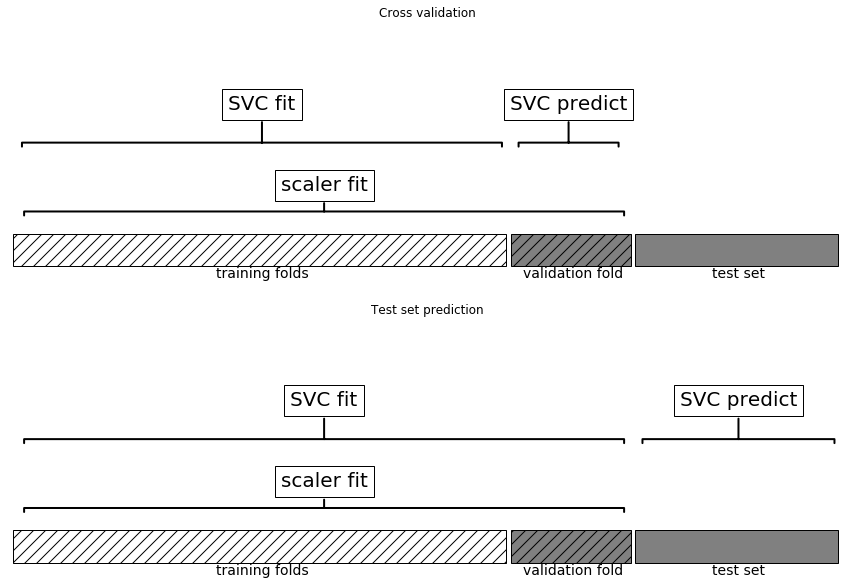

In [96]:
mglearn.plots.plot_improper_processing() 

In [98]:
from sklearn.pipeline import Pipeline 
pipe = Pipeline([("scaler", MinMaxScaler()), ("svm", SVC())])

In [99]:
pipe.fit(X_train, y_train) 

Pipeline(memory=None,
     steps=[('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('svm', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False))])

In [100]:
print(" : {:.2f}".format(pipe.score(X_test, y_test)))

 : 0.95


In [102]:
pipe

Pipeline(memory=None,
     steps=[('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('svm', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False))])

In [ ]:
# ensemble 과 grid search를 활용한 model selection
from sklearn.ensemble import AdaBoostClassifier
adab = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3), n_estimators=500, learning_rate=0.1)
adab.fit(x_train, y_train)
pred_adab = adab.predict(x_test)

In [ ]:
params = {'base_estimator__criterion':['gini','entropy'],
         'base_estimator__max_features':[7,8],
         'base_estimator__max_depth':[3,5,7],
         'n_estimators':[20,50,100],
         'learning_rate':[0.4,0.6,0.8]}

grid = GridSearchCV(estimator = adab, param_grid = params, cv=5)
grid.fit(x_train, y_train)
pred_adab_grid = grid.predict(x_test)

In [ ]:
# final test score - test data

In [ ]:
loans_ts = pd.read_csv('loans_ts.csv')

t_ts = loans_ts.lioc[:,-1:]
x_ts = loans_ts.lioc[:,-1:]



In [103]:
param_grid = {'svm__C': [0.001, 0.01, 0.1, 1, 10, 100], 'svm__gamma': [0.001, 0.01, 0.1, 1, 10, 100]}

In [105]:
grid = GridSearchCV(pipe, param_grid=param_grid, cv=5) 
grid.fit(X_train, y_train) 
print(" : {:.2f}".format(grid.best_score_)) 
print(" : {:.2f}".format(grid.score(X_test, y_test))) 
print(" : {}".format(grid.best_params_))

 : 0.98
 : 0.97
 : {'svm__C': 1, 'svm__gamma': 1}


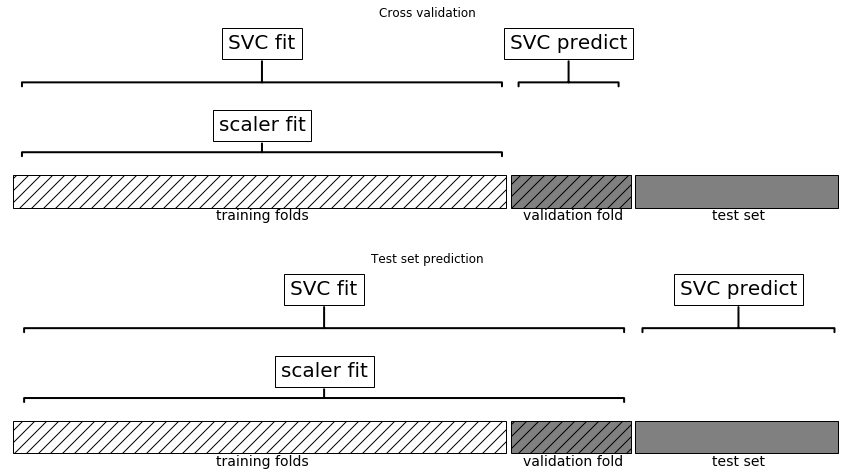

In [106]:
mglearn.plots.plot_proper_processing() 

In [107]:
import numpy as np 
rnd = np.random.RandomState(seed=0) 
X = rnd.normal(size=(100, 10000)) 
y = rnd.normal(size=(100,))

In [108]:
from sklearn.feature_selection import SelectPercentile, f_regression

In [109]:
select = SelectPercentile(score_func=f_regression, percentile=5).fit(X, y)
X_selected = select.transform(X)
print("X_selected.shape: {}".format(X_selected.shape))

X_selected.shape: (100, 500)


In [110]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge
print(" (): {:.2f}".format( np.mean(cross_val_score(Ridge(), X_selected, y, cv=5)))) 

 (): 0.91


In [111]:
 def fit(self, X, y):
        X_transformed = X 
        for name, estimator in self.steps[:-1]: 
            print(name, estimator)
            X_transformed = estimator.fit_transform(X_transformed, y) 
        self.steps[-1][1].fit(X_transformed, y) 
        return self 

In [113]:
 def predict(self, X):
        X_transformed = X
        for step in self.steps[:-1]:
            # transform 
            X_transformed = step[1].transform(X_transformed)
            # predict 
        return self.steps[-1][1].predict(X_transformed)

In [116]:
pipe = Pipeline([('preprocessing', StandardScaler()), ('classifier', SVC())])

In [117]:
from sklearn.ensemble import RandomForestClassifier
param_grid = [ {'classifier': [SVC()], 'preprocessing': [StandardScaler()], 'classifier__gamma': [0.001, 0.01, 0.1, 1, 10, 100], 'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100]}, {'classifier': [RandomForestClassifier(n_estimators=100)], 'preprocessing': [None], 'classifier__max_features': [1, 2, 3]}]

In [118]:
 X_train, X_test, y_train, y_test = train_test_split( cancer.data, cancer.target, random_state=0)
grid = GridSearchCV(pipe, param_grid, cv=5) 
grid.fit(X_train, y_train)
print(" :\n{}\n".format(grid.best_params_)) 
print(" : {:.2f}".format(grid.best_score_)) 
print(" : {:.2f}".format(grid.score(X_test, y_test)))

 :
{'classifier': SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False), 'classifier__C': 10, 'classifier__gamma': 0.01, 'preprocessing': StandardScaler(copy=True, with_mean=True, with_std=True)}

 : 0.99
 : 0.98
